# 실습 2 1 Single Input 

Step : 0 	 Cost : 1.4311109781265259 	 W : [1.0489569] 	 B : [0.02658378] 	
Step : 1 	 Cost : 0.017097461968660355 	 W : [0.9926303] 	 B : [0.00168428] 	
Step : 2 	 Cost : 0.00020664437033701688 	 W : [0.99883497] 	 B : [0.00429531] 	
Step : 3 	 Cost : 4.767146037920611e-06 	 W : [0.99820423] 	 B : [0.00390226] 	
Step : 4 	 Cost : 2.2463661935034906e-06 	 W : [0.9983194] 	 B : [0.00384012] 	
Step : 5 	 Cost : 2.1122252746863523e-06 	 W : [0.9983519] 	 B : [0.00374434] 	
Step : 6 	 Cost : 2.0115178358537378e-06 	 W : [0.9983924] 	 B : [0.00365472] 	
Step : 7 	 Cost : 1.9161636828357587e-06 	 W : [0.9984309] 	 B : [0.0035668] 	
Step : 8 	 Cost : 1.8251872688779258e-06 	 W : [0.9984687] 	 B : [0.00348108] 	
Step : 9 	 Cost : 1.7382831174472813e-06 	 W : [0.9985055] 	 B : [0.00339738] 	
Step : 10 	 Cost : 1.6558083189011086e-06 	 W : [0.9985414] 	 B : [0.00331572] 	
Step : 11 	 Cost : 1.5771929611219093e-06 	 W : [0.99857646] 	 B : [0.003236] 	
Step : 12 	 Cost : 1.5021345234345063e-06 	 W

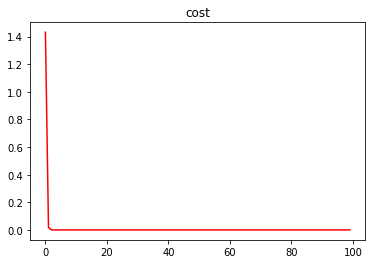


=== Test ===
X: 5, Y: [4.9995437]
X: 2.5, Y: [2.499962]


In [69]:
# X 와 Y 의 상관관계를 분석하는 기초적인 선형 회귀 모델을 만들고 실행해봅니다.
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

# name: 나중에 텐서보드등으로 값의 변화를 추적하거나 살펴보기 쉽게 하기 위해 이름을 붙여줍니다.
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

# 
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='w')
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='b')

# X 와 Y 의 상관 관계를 분석하기 위한 가설 수식을 작성합니다.
# y = W * x + b
# W 와 X 가 행렬이 아니므로 tf.matmul 이 아니라 기본 곱셈 기호를 사용했습니다.
hypothesis = X * W + b

# 손실 함수를 작성합니다.
# mean(h - Y)^2 : 예측값과 실제값의 거리를 비용(손실) 함수로 정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 경사 하강법 최적화를 수행합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
# 비용을 최소화 하는 것이 최종 목표
train_op = optimizer.minimize(cost)

# 세션을 생성하고 초기화합니다.
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 최적화를 100번 수행합니다.
cost_vals=[]
for step in range(100):
    # sess.run 을 통해 train_op 와 cost 그래프를 계산합니다.
    # 이 때, 가설 수식에 넣어야 할 실제값을 feed_dict 을 통해 전달합니다.
    _, cost_val = sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data})
    cost_vals.append(cost_val)
    print('Step : {} \t Cost : {} \t W : {} \t B : {} \t'.format(step, cost_val, sess.run(W), sess.run(b)))

    
plt.title('cost')
plt.plot(range(100) , cost_vals , c='r')
plt.show()


# Test 

print("X: 5, Y:", sess.run(hypothesis, feed_dict={X: 5}))
print("X: 2.5, Y:", sess.run(hypothesis, feed_dict={X: 2.5}))

In [ ]:
#1 Homework 데이터를 
학습데이터를 
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]
로 바꾸어 보세요 

#2 Homework 데이터를 
x_data = [4.0391, 1.3197, 9.5613, 0.5978, 3.5316, 0.1540, 1.6899, 7.3172, 4.5092, 2.9632]
y_data = [11.4215, 10.0112, 30.2991, 1.0625, 13.1776, -3.1976, 6.7367, 23.8550, 14.8951, 11.6137]

#학습 데이터를 아래와  같이 바꾸어 보세요.
import numpy as np
num_points = 1000
vectors_set = []
for i in range(num_points):
         x1= np.random.normal(0.0, 0.55)
         y1= x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
         vectors_set.append([x1, y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]


#2 지금 하고 있는 과정은 Regression , Classification 중 무엇일까요? 


#3 learning rate 을 1 , 0.1 , 0.01 , 0.001 로 바꾸어 보세요 


#4 입력값에 100, 1000 ,20000 을 넣어보세요

# 실습 2 Multi Input 

In [73]:
import tensorflow as tf

x1_data = [1, 0, 3, 0, 5]
x2_data = [0, 2, 0, 4, 0]
y_data  = [1, 2, 3, 4, 5]

W1 = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
W2 = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

b  = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

# feature 갯수만큼 곱하는 이 부분을 제외하면 one-variable과 다른 곳이 없다
hypothesis = W1*x1_data + W2*x2_data + b

cost = tf.reduce_mean(tf.square(hypothesis - y_data))

rate = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(rate)
train = optimizer.minimize(cost)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

for step in range(2001):

    sess.run(train)

    if step%20 == 0:
        print('Step : {}\tCost : {}\tW1 : {}\tW2 : {}\tB : {}\t'.format(step, sess.run(cost), sess.run(W1), sess.run(W2), sess.run(b)))
sess.close()

Step : 0	Cost : 0.04338962584733963	W1 : [0.9298728]	W2 : [0.85036135]	B : [0.419412]	
Step : 20	Cost : 0.008890391327440739	W1 : [0.9412418]	W2 : [0.9302837]	B : [0.2235246]	
Step : 40	Cost : 0.0025741304270923138	W1 : [0.9683827]	W2 : [0.9624863]	B : [0.12027644]	
Step : 60	Cost : 0.0007453166181221604	W1 : [0.9829871]	W2 : [0.97981423]	B : [0.06471964]	
Step : 80	Cost : 0.00021580225438810885	W1 : [0.9908455]	W2 : [0.98913825]	B : [0.03482502]	
Step : 100	Cost : 6.248321733437479e-05	W1 : [0.9950741]	W2 : [0.99415535]	B : [0.01873898]	
Step : 120	Cost : 1.8091650417773053e-05	W1 : [0.9973494]	W2 : [0.9968551]	B : [0.01008324]	
Step : 140	Cost : 5.2382456487976015e-06	W1 : [0.9985737]	W2 : [0.99830776]	B : [0.00542566]	
Step : 160	Cost : 1.516641532361973e-06	W1 : [0.9992326]	W2 : [0.9990894]	B : [0.00291949]	
Step : 180	Cost : 4.3907442659474327e-07	W1 : [0.99958706]	W2 : [0.99951005]	B : [0.00157095]	
Step : 200	Cost : 1.2713790908946976e-07	W1 : [0.99977773]	W2 : [0.99973637]	B : 